Langkah awal yang harus dilakukan adalah mengimpor pustaka yang akan kita gunakan, seperti openCV, numpy, matplotlib, glob, dan skimage.




In [ ]:
#import library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

Mendefinisikan fungsi untuk metode yang akan kita eksekusi. Fungsi pertama di bawah ini adalah fungsi load_image(). Tujuan dari fungsi ini adalah untuk memuat dataset/gambar dari komputer lokal dan menyimpannya ke dalam sebuah array. Nilai yang dikembalikan oleh fungsi ini adalah sebuah array gambar.

In [ ]:
#membuat fungsi load_image
def load_image(arr):
    strr = "Datasets/*.jpg"
    for file in glob.glob(strr):
        img=np.asarray(plt.imread(file))
        arr.append(img)
    return arr

Fungsi Berikutnya adalah fungsi preprocessing().
Fungsi ini bertujuan untuk memproses dataset kita menjadi gambar skala keabuan.



In [ ]:
#membuat fungsi preprocessing
def preprocessing(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep

Fungsi ini mendefinisikan extractLBP(). fungsi ini adalah mengembalikan 2 nilai. Nilai pertama adalah hasil ekstraksi tekstur dalam bentuk gambar. Dan nilai kedua adalah hasil ekstraksi tekstur dalam bentuk vektor.

In [ ]:
#membuat fungsi extractLBP
def extractLBP(img):
    lbp = local_binary_pattern(img, 24,3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 27),range=(0, 26))
    hist = hist.astype("float")
    hist /= (hist.sum() + (1e-7))
    return lbp,hist

Fungsi terakhir adalah featureExtraction(). Fungsi ini bertujuan untuk mengembalikan array baru yang berisi tekstur yang diekstraksi, beserta vektornya.

In [ ]:
#membuat fungsi featureextraction
def featureExtraction(arr):
    arr_feature=[]
    vector_feature=[]
    for i in range(np.shape(arr)[0]):
        lb,vektor = extractLBP(arr[i])
        arr_feature.append(lb)
        vector_feature.append(vektor)
    return arr_feature, vector_feature

Langkah selanjutnya adalah memuat dataset dan akan disimpan kedalam array

In [ ]:
#memuat dataset
data=[]
data=load_image(data)

Setelah dataset tersimpan, lalu melakukan proses rubah gambar ke greyscale

In [ ]:
#merubah gambar ke greyscale
dataPreprocessed = preprocessing(data)

Tahap terakhir adalah mendapatkan hasil ekstraksi tekstur

In [ ]:
#mendapatkan hasil ekstraksi
dataExtracted,vector = featureExtraction(dataPreprocessed)

Extraction Result


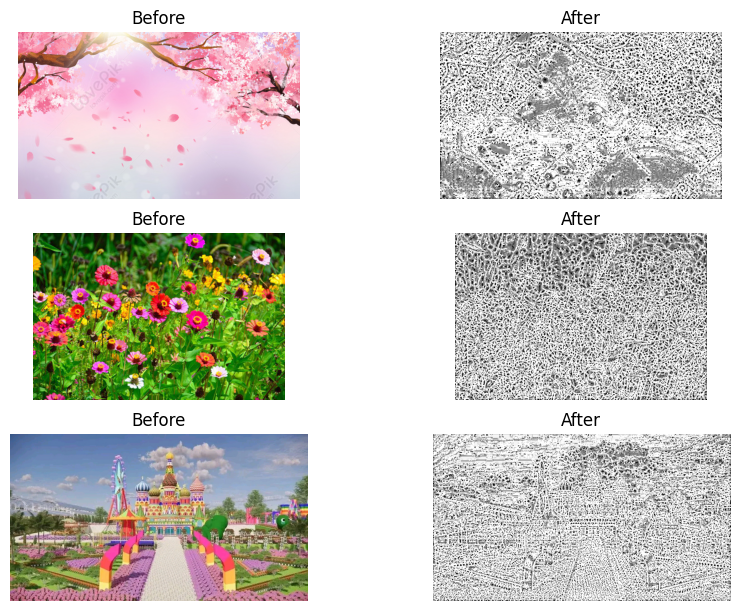

In [ ]:
#menampilkan hasi ekstraksi tekstur
print('Extraction Result')
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('Before')
ax1.set_axis_off()
ax1.imshow(data[0])

ax2 = fig.add_subplot(4,2,2)
ax2.set_title('After')
ax2.set_axis_off()
ax2.imshow(dataExtracted[0],cmap=plt.cm.gray)

ax3 = fig.add_subplot(4,2,3)
ax3.set_title('Before')
ax3.set_axis_off()
ax3.imshow(data[1],)

ax4 = fig.add_subplot(4,2,4)
ax4.set_title('After')
ax4.set_axis_off()
ax4.imshow(dataExtracted[1],cmap=plt.cm.gray)

ax5 = fig.add_subplot(4,2,5)
ax5.set_title('Before')
ax5.set_axis_off()
ax5.imshow(data[2])

ax6 = fig.add_subplot(4,2,6)
ax6.set_title('After')
ax6.set_axis_off()
ax6.imshow(dataExtracted[2],cmap=plt.cm.gray)
plt.show()